# Dependencies  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import random
from glob import glob
from keras import models
from keras import layers
from tensorflow.keras.layers import Dropout,Flatten,Dense,Input,AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Classes listing:

In [2]:
glasses_dir='/kaggle/input/datacleaningglassesnoglasses/Images/Images/glasses'

no_glasses_dir='/kaggle/input/datacleaningglassesnoglasses/Images/Images/no_glasses'

all_glasses_images_lst=sorted(glob(glasses_dir+'/*jpg'))

all_no_glasses_images_lst=sorted(glob(no_glasses_dir+'/*jpg'))

# Glasses Class Examples:

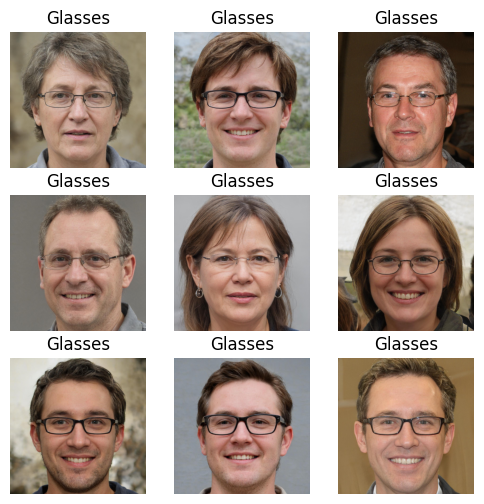

In [3]:
ran_num = []
plt.figure(figsize=(6, 6))
for i in range(9):
    rdm_indx=np.random.randint(len(all_glasses_images_lst))
    ran_num.append(rdm_indx)

for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(all_glasses_images_lst[ran_num[i]]))
    plt.title('Glasses')
    plt.axis("off")

# No Glasses Class Examples:

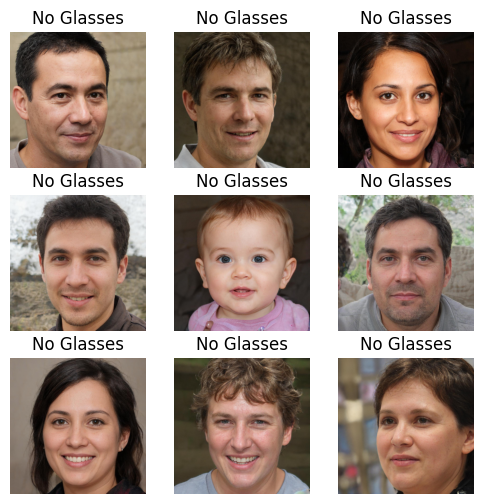

In [3]:
ran_num = []
plt.figure(figsize=(6, 6))
for i in range(9):
    rdm_indx=np.random.randint(len(all_no_glasses_images_lst))
    ran_num.append(rdm_indx)

for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(all_no_glasses_images_lst[ran_num[i]]))
    plt.title('No Glasses')
    plt.axis("off")

# Data Balance Check

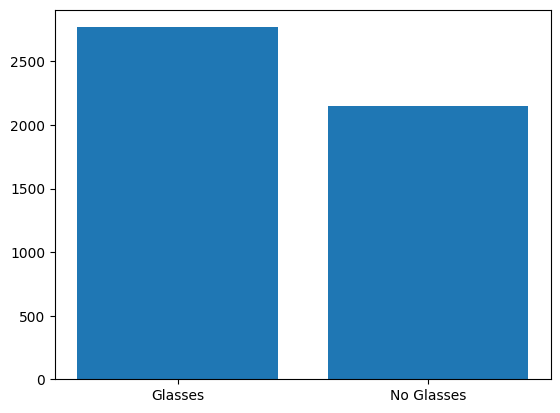

In [4]:
Balance={'Glasses': len(all_glasses_images_lst), 'No Glasses': len(all_no_glasses_images_lst) }
plt.bar(Balance.keys(),Balance.values());

# Random Sample shape

In [5]:
print(mpimg.imread(all_no_glasses_images_lst[ran_num[3]]).shape)
print(mpimg.imread(all_no_glasses_images_lst[ran_num[4]]).shape)
print(mpimg.imread(all_no_glasses_images_lst[ran_num[5]]).shape)
print(mpimg.imread(all_no_glasses_images_lst[ran_num[6]]).shape)

(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


In [6]:
All_images=all_no_glasses_images_lst + all_no_glasses_images_lst

In [8]:
All_data_dir='/kaggle/input/datacleaningglassesnoglasses/Images/Images'

# Splitting Data into Training and Validation Folders (80% - 20%)

In [7]:
import os
import shutil

data_folder = '/kaggle/working/data_folder'
# Create the new folder
os.makedirs(data_folder, exist_ok=True)

train_folder_path = os.path.join(data_folder, 'train')
validation_folder_path = os.path.join(data_folder, 'validation')


train_folder_glasses_path = os.path.join(train_folder_path, 'glasses_train')
train_folder_noglasses_path = os.path.join(train_folder_path, 'no_glasses_train')

validation_folder_glasses_path = os.path.join(validation_folder_path, 'glasses_validation')
validation_folder_noglasses_path = os.path.join(validation_folder_path, 'no_glasses_validation')


# Create the train and validation folders
os.makedirs(train_folder_path, exist_ok=True)
os.makedirs(validation_folder_path, exist_ok=True)

os.makedirs(train_folder_glasses_path, exist_ok=True)
os.makedirs(train_folder_noglasses_path, exist_ok=True)

os.makedirs(validation_folder_glasses_path, exist_ok=True)
os.makedirs(validation_folder_noglasses_path, exist_ok=True)


In [8]:
for filename in os.listdir(glasses_dir)[:int(0.8*len(os.listdir(glasses_dir)))]:
    src_path = os.path.join(glasses_dir, filename)
    dest_path = os.path.join(train_folder_glasses_path, filename)
    shutil.copy(src_path, dest_path)
    

for filename in os.listdir(glasses_dir)[int(0.8*len(os.listdir(glasses_dir))):]:
    src_path = os.path.join(glasses_dir, filename)
    dest_path = os.path.join(validation_folder_glasses_path, filename)
    shutil.copy(src_path, dest_path)    
    

In [12]:
for filename in os.listdir(no_glasses_dir)[:int(0.8*len(os.listdir(no_glasses_dir)))]:
    src_path = os.path.join(no_glasses_dir, filename)
    dest_path = os.path.join(train_folder_noglasses_path, filename)
    shutil.copy(src_path, dest_path)
    

for filename in os.listdir(no_glasses_dir)[int(0.8*len(os.listdir(no_glasses_dir))):]:
    src_path = os.path.join(no_glasses_dir, filename)
    dest_path = os.path.join(validation_folder_noglasses_path, filename)
    shutil.copy(src_path, dest_path)
    

# Data Augmentation and loading using Generator 

In [27]:

train_datagen = ImageDataGenerator(
                                rescale = 1/255,
                                zoom_range=0.10,
                                width_shift_range=0.05,
                                height_shift_range=0.05,
                                shear_range=0.05, 
                                fill_mode="nearest",
                                horizontal_flip=True,
                                rotation_range=20,
                                brightness_range=[0.5, 1.5],
                            )


val_datagen = ImageDataGenerator( rescale = 1/255,validation_split=0.5 ) 

train_generator = train_datagen.flow_from_directory(
    train_folder_path,
    target_size=(256, 256),
    seed=42,
    batch_size=64,
    class_mode='categorical',
)

validation_generator = val_datagen.flow_from_directory(
    validation_folder_path,
    target_size=(256, 256),
    seed=42,
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

test_datagen = val_datagen.flow_from_directory(
    validation_folder_path,
    target_size=(256, 256),
    batch_size=64,
    seed=42,
    class_mode='categorical',
    subset='validation'  
)


Found 3935 images belonging to 2 classes.
Found 493 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


# Displaying a Batch

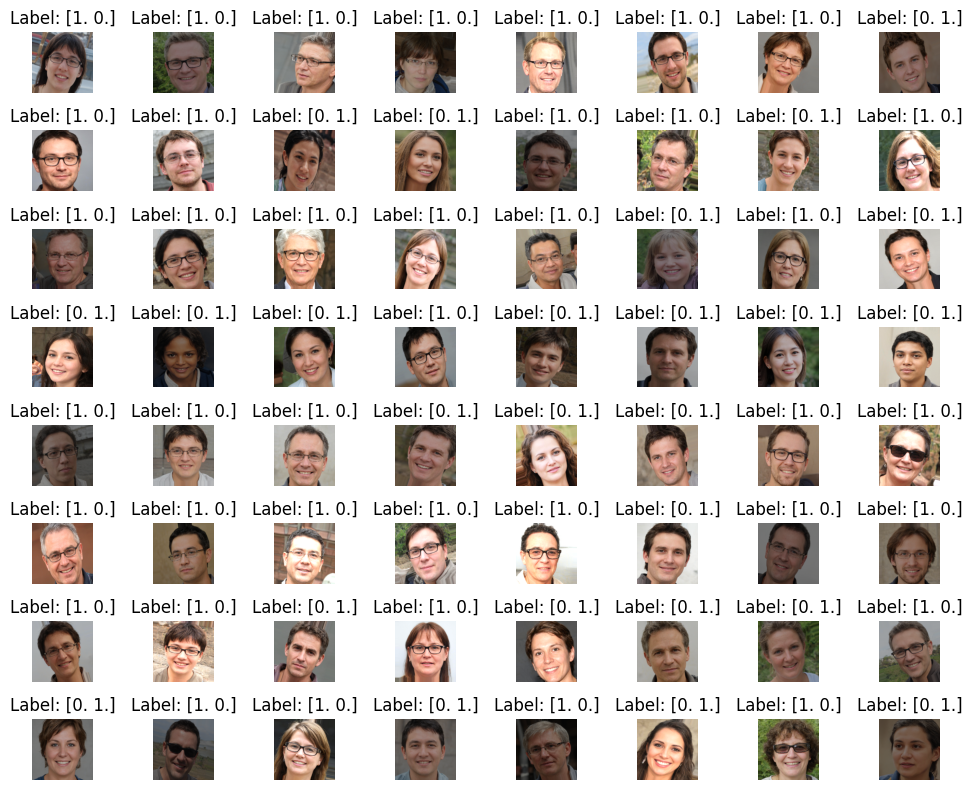

In [28]:
images, labels = next(train_generator)

fig, axes = plt.subplots(8, 8, figsize=(10, 8))
axes = axes.ravel()
for i in range(len(axes)):
    axes[i].imshow(images[i])
    axes[i].set_title(f'Label: {labels[i]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Creating Conv Model

In [29]:
model_DA = models.Sequential()
model_DA.add(layers.Conv2D(32,(3,3), activation='relu', name='Layer_1',padding='same', input_shape=(256,256, 3)))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Conv2D(64,(3,3), activation='relu', name='Layer_2'))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Conv2D(128,(3,3), activation='relu', name='Layer_3'))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Conv2D(64,(3,3), activation='relu', name='Layer_4'))
model_DA.add(layers.MaxPooling2D((2, 2)))
model_DA.add(layers.Flatten())
model_DA.add(layers.Dense(512, activation='relu'))
model_DA.add(layers.Dense(128, activation='relu'))
model_DA.add(layers.Dropout(0.1))
model_DA.add(layers.Dense(2, activation='softmax'))

In [30]:
model_DA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Conv2D)            (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 Layer_2 (Conv2D)            (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 Layer_3 (Conv2D)            (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [31]:
model_DA.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

# Conv Model Fitting

In [32]:
history_DA = model_DA.fit(
          train_generator,
          epochs=20,
          validation_data=validation_generator,
          verbose=2,
                )

Epoch 1/20
62/62 - 102s - loss: 0.3600 - acc: 0.8008 - val_loss: 0.0097 - val_acc: 0.9959 - 102s/epoch - 2s/step
Epoch 2/20
62/62 - 92s - loss: 0.0581 - acc: 0.9814 - val_loss: 7.8206e-04 - val_acc: 1.0000 - 92s/epoch - 1s/step
Epoch 3/20
62/62 - 92s - loss: 0.0459 - acc: 0.9886 - val_loss: 1.2636e-04 - val_acc: 1.0000 - 92s/epoch - 1s/step
Epoch 4/20
62/62 - 89s - loss: 0.0199 - acc: 0.9949 - val_loss: 1.1719e-04 - val_acc: 1.0000 - 89s/epoch - 1s/step
Epoch 5/20
62/62 - 91s - loss: 0.0181 - acc: 0.9952 - val_loss: 1.0193e-05 - val_acc: 1.0000 - 91s/epoch - 1s/step
Epoch 6/20
62/62 - 94s - loss: 0.0154 - acc: 0.9964 - val_loss: 1.1375e-04 - val_acc: 1.0000 - 94s/epoch - 2s/step
Epoch 7/20
62/62 - 91s - loss: 0.0196 - acc: 0.9952 - val_loss: 0.0024 - val_acc: 1.0000 - 91s/epoch - 1s/step
Epoch 8/20
62/62 - 90s - loss: 0.0120 - acc: 0.9962 - val_loss: 1.3480e-06 - val_acc: 1.0000 - 90s/epoch - 1s/step
Epoch 9/20
62/62 - 89s - loss: 0.0129 - acc: 0.9967 - val_loss: 0.0023 - val_acc: 1.00

In [34]:
test_loss, test_acc = model_DA.evaluate(test_datagen)
print('Test accuracy:', test_acc)

8/8 [==============================] - 4s 497ms/step - loss: 1.3439e-05 - acc: 1.0000
Test accuracy: 1.0


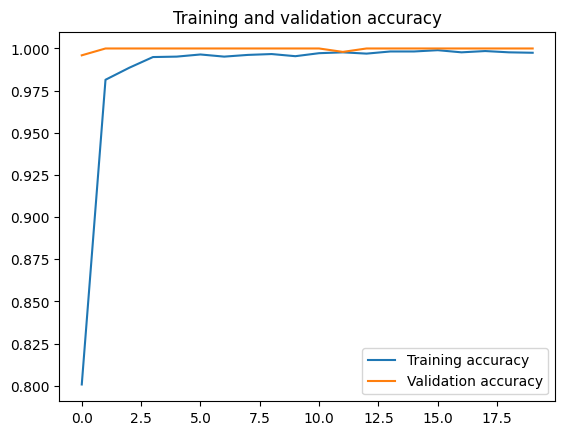

In [35]:
acc = history_DA.history['acc']
val_acc = history_DA.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy',color='C0')
plt.plot(epochs, val_acc, label='Validation accuracy',color='C1')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

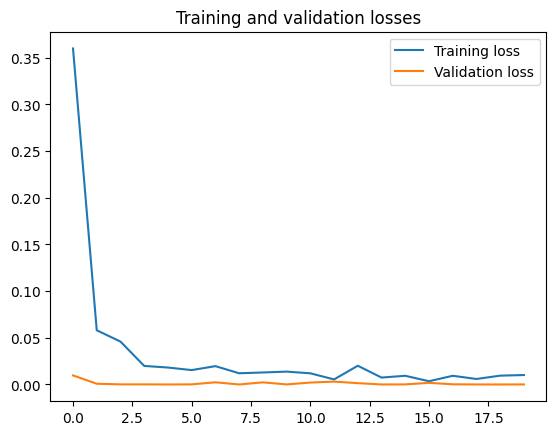

In [36]:
loss = history_DA.history['loss']
val_loss = history_DA.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, label='Training loss',color='C0')
plt.plot(epochs, val_loss, label='Validation loss',color='C1')
plt.title('Training and validation losses')
plt.legend()
plt.show()

In [37]:
model_DA.save("model_DA.h5")

In [38]:
%cd /kaggle/working/
!ls

/kaggle/working
__notebook_source__.ipynb  data_folder	model_DA.h5


In [39]:
from IPython.display import FileLink 
FileLink(r'model_DA.h5')



/kaggle/working/model_DA.h5

# Using Pre-Trained Model (MobileNet-V2)

In [89]:

train_datagen = ImageDataGenerator(
                                preprocessing_function=preprocess_input,
                                zoom_range=0.10,
                                width_shift_range=0.05,
                                height_shift_range=0.05,
                                shear_range=0.05, 
                                fill_mode="nearest",
                                horizontal_flip=True,
                                rotation_range=20,
                                brightness_range=[0.5, 1.5],
                                   )


val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input, validation_split=0.5 ) 

train_generator = train_datagen.flow_from_directory(
    train_folder_path,
    target_size=(224,224),
    seed=42,
    batch_size=64,
    class_mode='categorical',
)

validation_generator = val_datagen.flow_from_directory(
    validation_folder_path,
    target_size=(224,224),
    seed=42,
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

test_datagen = val_datagen.flow_from_directory(
    validation_folder_path,
    target_size=(224,224),
    batch_size=64,
    seed=42,
    class_mode='categorical',
    subset='validation'  
)


Found 3935 images belonging to 2 classes.
Found 493 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


- Frozen Model

In [90]:
conv_base= MobileNetV2(
                    weights='imagenet',
                    include_top=False,
                    input_shape=(224,224, 3)
                   )

In [91]:
model_DL = models.Sequential()
model_DL.add(conv_base)
model_DL.add(layers.Flatten())
model_DL.add(layers.Dense(64, activation='relu'))
model_DL.add(layers.Dropout(0.1))
model_DL.add(layers.Dense(2, activation='softmax'))

In [92]:
model_DL.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_22 (Dense)            (None, 64)                4014144   
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 130       
                                                                 
Total params: 6,272,258
Trainable params: 6,238,146
Non-trainable params: 34,112
______________________________________

In [93]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_DL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 160


# Conv Base Freezing 

In [94]:
conv_base.trainable = False

In [95]:
print('This is the number of trainable weights '
      'After freezing the conv base:', len(model_DL.trainable_weights))

This is the number of trainable weights After freezing the conv base: 4


In [96]:
model_DL.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_22 (Dense)            (None, 64)                4014144   
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 130       
                                                                 
Total params: 6,272,258
Trainable params: 4,014,274
Non-trainable params: 2,257,984
___________________________________

In [97]:
model_DL.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

# Pre-Trained Model Fitting

In [98]:
history_DL = model_DL.fit(
                    train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    verbose=2)

Epoch 1/20
62/62 - 82s - loss: 0.5095 - acc: 0.9479 - val_loss: 0.0100 - val_acc: 0.9959 - 82s/epoch - 1s/step
Epoch 2/20
62/62 - 77s - loss: 0.0281 - acc: 0.9921 - val_loss: 0.0061 - val_acc: 1.0000 - 77s/epoch - 1s/step
Epoch 3/20
62/62 - 78s - loss: 0.0252 - acc: 0.9919 - val_loss: 0.0301 - val_acc: 0.9878 - 78s/epoch - 1s/step
Epoch 4/20
62/62 - 76s - loss: 0.0223 - acc: 0.9947 - val_loss: 0.0418 - val_acc: 0.9899 - 76s/epoch - 1s/step
Epoch 5/20
62/62 - 80s - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0038 - val_acc: 0.9980 - 80s/epoch - 1s/step
Epoch 6/20
62/62 - 78s - loss: 0.0158 - acc: 0.9947 - val_loss: 0.0112 - val_acc: 0.9959 - 78s/epoch - 1s/step
Epoch 7/20
62/62 - 77s - loss: 0.0277 - acc: 0.9919 - val_loss: 0.0255 - val_acc: 0.9959 - 77s/epoch - 1s/step
Epoch 8/20
62/62 - 76s - loss: 0.0135 - acc: 0.9952 - val_loss: 0.0256 - val_acc: 0.9939 - 76s/epoch - 1s/step
Epoch 9/20
62/62 - 78s - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0073 - val_acc: 0.9980 - 78s/epoch - 1s/step
E

In [101]:
test_loss, test_acc = model_DL.evaluate(test_datagen)
print('Test accuracy:', test_acc)

8/8 [==============================] - 4s 443ms/step - loss: 0.0109 - acc: 0.9959
Test accuracy: 0.9959349632263184


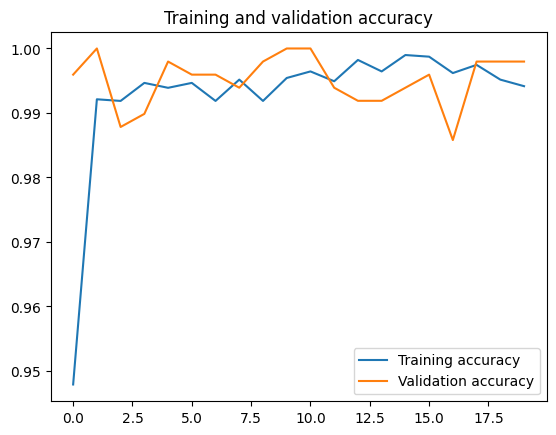

In [102]:
acc = history_DL.history['acc']
val_acc = history_DL.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy',color='C0')
plt.plot(epochs, val_acc, label='Validation accuracy',color='C1')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

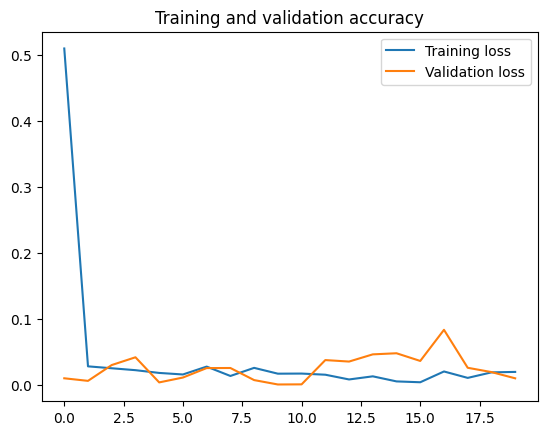

In [104]:
loss = history_DL.history['loss']
val_loss = history_DL.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, label='Training loss',color='C0')
plt.plot(epochs, val_loss, label='Validation loss',color='C1')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [105]:
model_DL.save("model_DL_frozen.h5")
FileLink(r'model_DL_frozen.h5')


/kaggle/working/model_DL_frozen.h5

# ** Fine Tunning **

In [107]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [109]:
len(conv_base.layers)

154

# Unfreezing 

In [110]:
conv_base.trainable = True
fine_tune_at = 100

for layer in conv_base.layers[:fine_tune_at]:
    layer.trainable =  False


In [112]:
from tensorflow.keras import optimizers


In [113]:
model_copy= keras.models.clone_model(model_DL)
model_copy.build((None, 224, 224, 3))                                
model_copy.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
model_copy.set_weights(model_DL.get_weights())

model_copy.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_22 (Dense)            (None, 64)                4014144   
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 130       
                                                                 
Total params: 6,272,258
Trainable params: 5,875,714
Non-trainable params: 396,544
_____________________________________

In [114]:
history_FT = model_copy.fit(
                    train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    verbose=2)

Epoch 1/20
62/62 - 92s - loss: 0.1790 - accuracy: 0.9906 - val_loss: 0.1170 - val_accuracy: 0.9817 - 92s/epoch - 1s/step
Epoch 2/20
62/62 - 76s - loss: 0.0454 - accuracy: 0.9959 - val_loss: 0.0678 - val_accuracy: 0.9878 - 76s/epoch - 1s/step
Epoch 3/20
62/62 - 77s - loss: 0.0138 - accuracy: 0.9985 - val_loss: 0.1882 - val_accuracy: 0.9554 - 77s/epoch - 1s/step
Epoch 4/20
62/62 - 79s - loss: 0.0173 - accuracy: 0.9980 - val_loss: 0.0142 - val_accuracy: 0.9980 - 79s/epoch - 1s/step
Epoch 5/20
62/62 - 78s - loss: 0.0140 - accuracy: 0.9977 - val_loss: 0.0104 - val_accuracy: 0.9980 - 78s/epoch - 1s/step
Epoch 6/20
62/62 - 76s - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0164 - val_accuracy: 0.9959 - 76s/epoch - 1s/step
Epoch 7/20
62/62 - 77s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0148 - val_accuracy: 0.9980 - 77s/epoch - 1s/step
Epoch 8/20
62/62 - 77s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0097 - val_accuracy: 0.9980 - 77s/epoch - 1s/step
Epoch 9/20
62/62 - 76s - loss: 0

In [117]:
test_loss, test_acc = model_copy.evaluate(test_datagen)
print('Test accuracy:', test_acc)

8/8 [==============================] - 3s 398ms/step - loss: 0.0167 - accuracy: 0.9959
Test accuracy: 0.9959349632263184


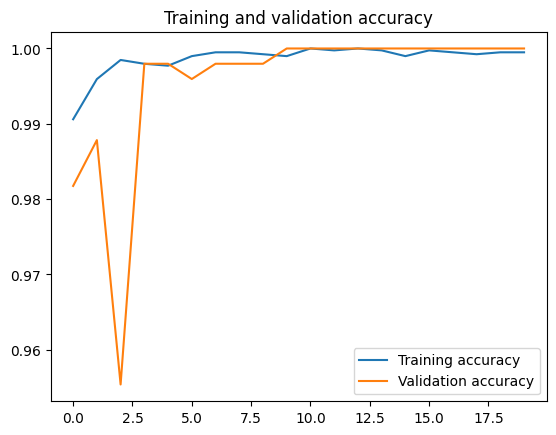

In [123]:
acc2 = history_FT.history['accuracy']
val_acc2 = history_FT.history['val_accuracy']

epochs = range(len(acc2))

plt.plot(epochs, acc2, label='Training accuracy',color='C0')
plt.plot(epochs, val_acc2, label='Validation accuracy',color='C1')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

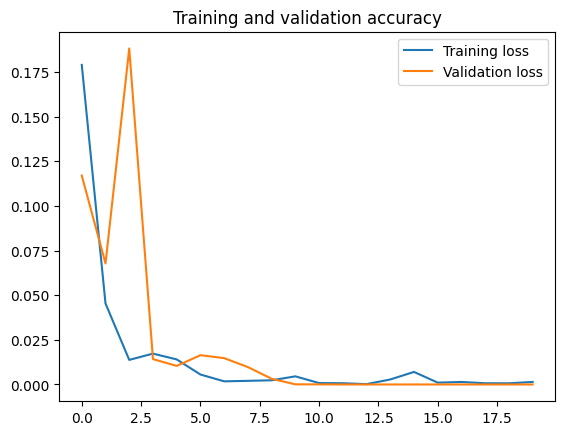

In [125]:
loss2 = history_FT.history['loss']
val_loss2 = history_FT.history['val_loss']

epochs = range(len(acc2))

plt.plot(epochs, loss2, label='Training loss',color='C0')
plt.plot(epochs, val_loss2, label='Validation loss',color='C1')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [126]:
[1,2,3,4]+[2,3,4,5]

[1, 2, 3, 4, 2, 3, 4, 5]

In [127]:
acc_train_tot=acc+acc2
acc_val_tot=val_acc+val_acc2

loss_train_tot=loss+loss2
loss_val_tot=val_loss+val_loss2


## Overall Performance Evaluation For The Model Before and After Fine Tuning

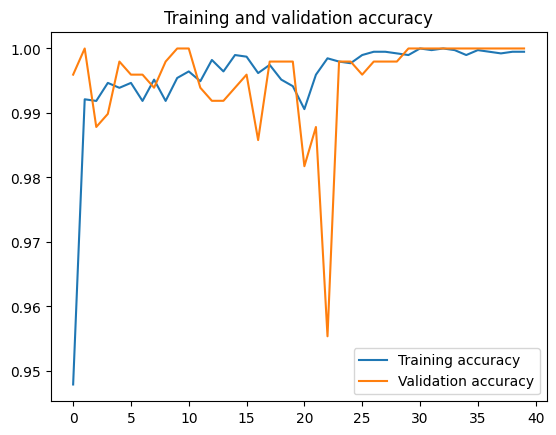

In [129]:

epochs = range(len(acc_train_tot))

plt.plot(epochs, acc_train_tot, label='Training accuracy',color='C0')
plt.plot(epochs, acc_val_tot, label='Validation accuracy',color='C1')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

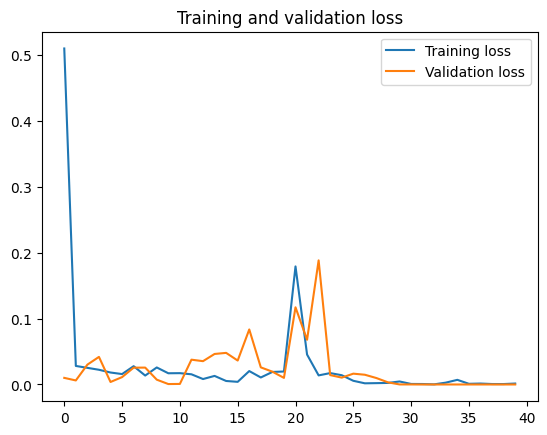

In [132]:

epochs = range(len(loss_train_tot))

plt.plot(epochs, loss_train_tot, label='Training loss',color='C0')
plt.plot(epochs, loss_val_tot, label='Validation loss',color='C1')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [133]:
model_copy.save("model_DL_fine_tuned.h5")
FileLink(r'model_DL_fine_tuned.h5')


/kaggle/working/model_DL_fine_tuned.h5

# Predictions

In [145]:
image_batch, label_batch = test_datagen.next()
predictions = model_copy.predict(image_batch)

2/2 [==============================] - 0s 28ms/step


In [146]:
predicted_labels = tf.argmax(predictions, axis=1)


In [147]:
print('Predictions:', predicted_labels)
print('Labels:', label_batch)

Predictions: tf.Tensor(
[1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0], shape=(64,), dtype=int64)
Labels: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [149]:
classe_name=['Glasses','No Glass']

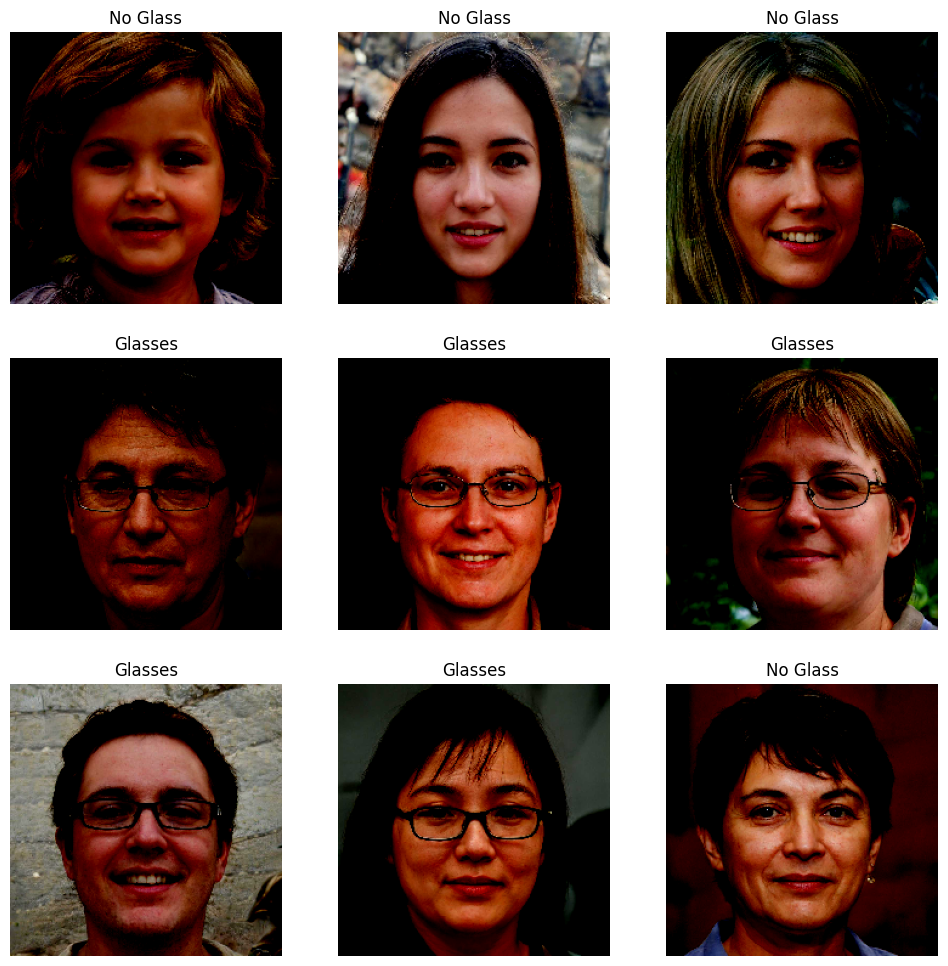

In [150]:
plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    plt.title(classe_name[predicted_labels[i]])
    plt.axis("off")